In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data, label = datasets.make_classification(n_samples = 1000, n_classes = 2, n_clusters_per_class = 1, n_features = 2,
                                           n_informative = 2, n_redundant = 0, random_state=3)

In [3]:
print(data.shape)

(1000, 2)


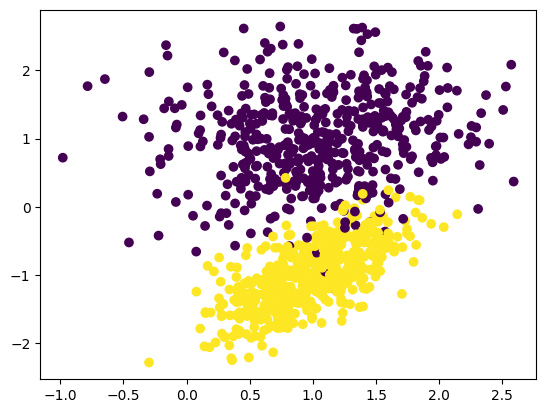

In [4]:
plt.scatter(data[:, 0], data[:, 1], c = label)

In [5]:
print(np.unique(label))

[0 1]


In [6]:
label[label == 0] = -1

In [7]:
print(np.unique(label))

[-1  1]


In [8]:
class SVM:

    def __init__(self, c = 0.01):
        self.C = c
        self.W = 0
        self.B = 0

    def hingeloss(self, W, B, X, Y):
        loss = 0.5 * (np.dot(W,W.T))

        for i in range(X.shape[0]):
            ji = Y[i]*(np.dot(W, X[i]) + B)
            loss += self.C*max(0,1-ji)

        return loss[0][0]

    def gradient_decent(self, X, Y, epochs = 100, batch_size = 200, lr_rate = 0.003):
        W = np.zeros((1,X.shape[1]))
        B = 0
        loss = []

        for epoch in range(epochs):
            ids = np.arange(X.shape[0])
            np.random.shuffle(ids)
            loss.append(self.hingeloss(W, B, X, Y))

            for batch_start in range(int(X.shape[0]/batch_size)):
                grad_w = 0
                grad_b = 0

                for i in range(batch_size*batch_start, batch_size*(batch_start + 1)):
                    j = ids[i]
                    
                    ji = Y[j] * (np.dot(W, X[j]) +B)
                    if ji > 1:
                        grad_w += 0
                        grad_b += 0
                    else:
                        grad_w += self.C*Y[j]*X[j]
                        grad_b += self.C*Y[j]
                
                W = W - lr_rate*W + lr_rate*grad_w
                B = B - lr_rate*grad_b

        self.W = W
        self.B = B
        return W, B, loss

In [52]:
svm = SVM()
W, B, loss = svm.gradient_decent(data, label)

In [53]:
loss

[9.999999999999831,
 9.702054967429385,
 9.4094262573666,
 9.122033667382972,
 8.839811323442458,
 8.562489904472464,
 8.29006004320222,
 8.022437023043029,
 7.759554558245375,
 7.501318265302396,
 7.247594621093993,
 6.998357977082019,
 6.753435273140453,
 6.51282196829337,
 6.2767269029423005,
 6.052969430288183,
 5.837033737020626,
 5.632091062040714,
 5.440439516600647,
 5.258481028438011,
 5.092358045569279,
 4.937056164742052,
 4.7935194807485875,
 4.660492120221415,
 4.5418426731098265,
 4.4329764943476855,
 4.334990230717944,
 4.246204918246389,
 4.164095078663881,
 4.089041395622127,
 4.020483929237264,
 3.9586598800845207,
 3.9013941729054262,
 3.84857772023959,
 3.799090605758021,
 3.7530499350671938,
 3.7105641554811313,
 3.6716325640470653,
 3.636307558636248,
 3.604435895539868,
 3.576005528242585,
 3.54922692486319,
 3.523854900595628,
 3.5017579374650376,
 3.481302661030246,
 3.461907174864389,
 3.4439566745857606,
 3.4283068517087463,
 3.4134192568856236,
 3.3993138349

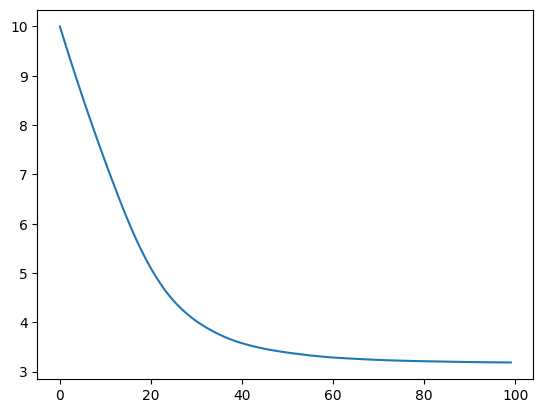

In [54]:
plt.plot(loss)

In [55]:
W, B

(array([[ 0.06362532, -0.82852252]]), -0.06182999999999994)

In [56]:
def visualize(w1, w2, b):
    X = np.arange(-1,5)
    dec_boun = -(w1*X + b)/w2

    supp_vec_1 = -(w1*X + b + 1)/w2
    supp_vec_2 = -(w1*X + b - 1)/w2

    plt.plot(X, dec_boun, color = "red", label = "Decision Boundary")
    plt.plot(X, supp_vec_1, color = "green", label = "Support vector")
    plt.plot(X, supp_vec_2, color = "blue", label = "Support vector")
    plt.scatter(data[:, 0], data[:, 1], c= label)
    plt.legend(title = "lines")

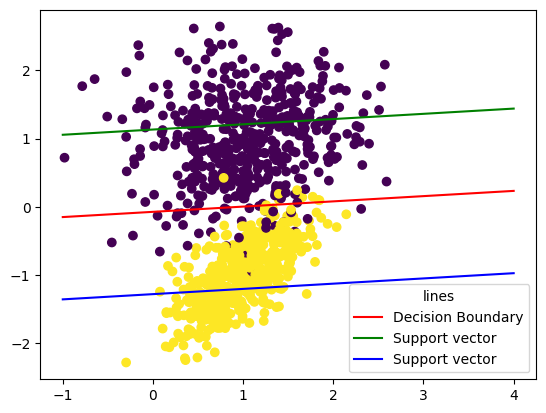

In [57]:
visualize(W[0][0], W[0][1], B)